Data Science Skill Based Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [ ]:
data_set = pd.read_csv('/content/forbes2000 - Sheet1.csv')

In [ ]:
data_set.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [ ]:
data_set.shape

(2000, 8)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2000 non-null   int64  
 1   Name          2000 non-null   object 
 2   Country       2000 non-null   object 
 3   Sales         1998 non-null   float64
 4   Profit        2000 non-null   float64
 5   Assets        1999 non-null   float64
 6   Market Value  1999 non-null   float64
 7   Year          2000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 125.1+ KB


Categorical Values

*   Name
*   Country



In [ ]:
data_set.isnull().sum()

Rank            0
Name            0
Country         0
Sales           2
Profit          0
Assets          1
Market Value    1
Year            0
dtype: int64

In [ ]:
# mean value of "Sales" column
data_set['Sales'].mean()

17.680185185185184

In [ ]:
# filling the missing values in "Sales column" with "Mean" value
data_set['Sales'].fillna(data_set['Sales'].mean(), inplace=True)

In [ ]:
# mean value of "Sales" column
data_set['Sales'].mean()

17.68018518518518

In [ ]:
# filling the missing values in "Assets column" with "Mean" value
data_set['Assets'].fillna(data_set['Assets'].mean(), inplace=True)

In [ ]:
data_set.isnull().sum()

Rank            0
Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    1
Year            0
dtype: int64

In [ ]:
# mean value of "Market Value" column
data_set['Market Value'].mean()

24.42354277138569

In [ ]:
# filling the missing values in "Market Value column" with "Mean" value
data_set['Market Value'].fillna(data_set['Market Value'].mean(), inplace=True)

In [ ]:
# checking for missing values
data_set.isnull().sum()

Rank            0
Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
Year            0
dtype: int64

In [ ]:
data_set.describe()

,Rank,Sales,Profit,Assets,Market Value,Year
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,1000.500000,17.680185,1.241552,84.569579,24.423543,2017.0
std,577.494589,29.315271,2.918115,260.978914,44.761178,0.0
min,1.000000,0.001000,-13.042100,0.001000,0.072000,2017.0
25%,500.750000,4.031750,0.317975,10.862250,6.640750,2017.0
50%,1000.500000,8.822000,0.612300,22.890500,11.956500,2017.0
75%,1500.250000,17.470500,1.279825,52.461000,24.380000,2017.0
max,2000.000000,485.252000,45.217000,3473.238000,752.039000,2017.0


In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


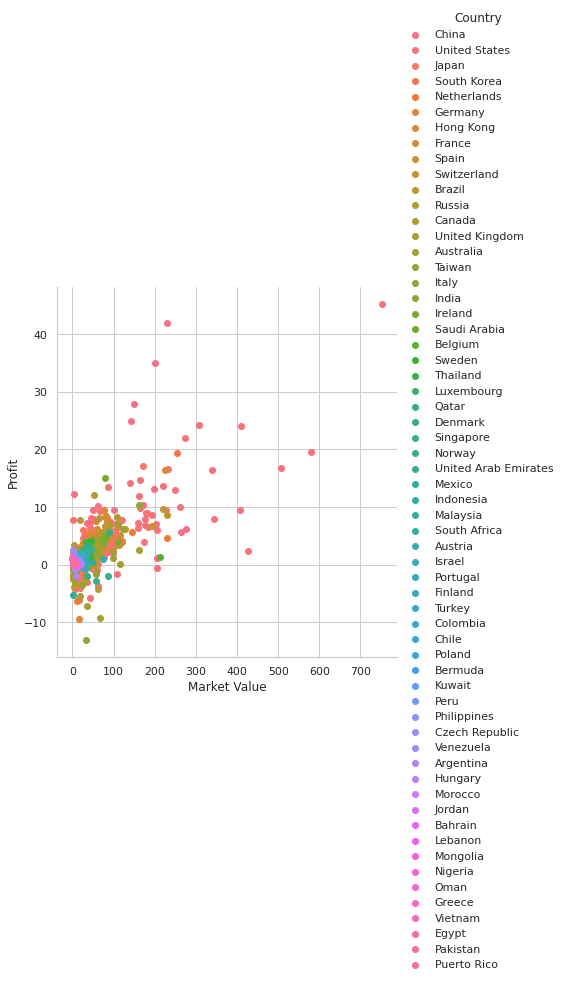

In [ ]:
# sns
sns.set_style('whitegrid');
sns.FacetGrid(data_set, hue='Country', size=6) \
 .map(plt.scatter,'Market Value', 'Profit')  \
 .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


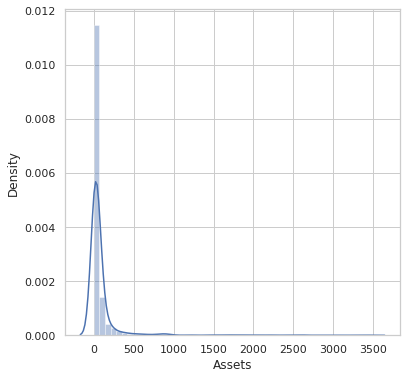

In [ ]:
# Market Value distribution
plt.figure(figsize=(6,6))
sns.distplot(data_set['Assets'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


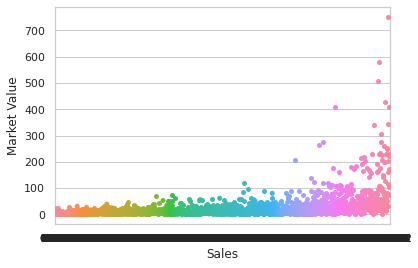

In [ ]:
sns.set_style('whitegrid');
sns.swarmplot(x='Sales', y='Market Value', data = data_set)

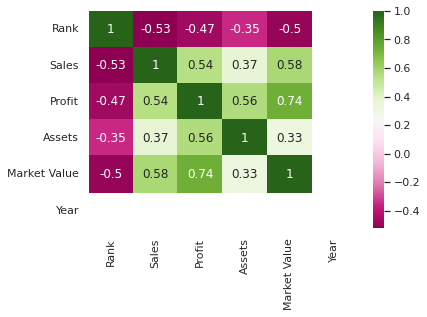

In [ ]:
# Heatmap
corrs = data_set.corr()
sns.heatmap(corrs,cmap='PiYG',annot=True)

In [ ]:
data_set.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [ ]:
encoder = LabelEncoder()

In [ ]:
data_set['Name'] = encoder.fit_transform(data_set['Name'])
data_set['Country'] = encoder.fit_transform(data_set['Country'])

In [ ]:
data_set.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,918,9,151.381,41.9837,3473.238,229.805,2017
1,2,415,9,134.242,34.9814,3016.578,200.458,2017
2,3,289,58,222.935,24.0740,620.854,409.908,2017
3,4,997,58,102.494,24.2310,2512.986,306.616,2017
4,5,1929,58,97.573,21.9380,1943.443,274.385,2017


In [ ]:
X = data_set.drop(columns = 'Assets', axis = 1)
Y = data_set['Assets']

In [ ]:
X

,Rank,Name,Country,Sales,Profit,Market Value,Year
0,1,918,9,151.381,41.9837,229.805,2017
1,2,415,9,134.242,34.9814,200.458,2017
2,3,289,58,222.935,24.0740,409.908,2017
3,4,997,58,102.494,24.2310,306.616,2017
4,5,1929,58,97.573,21.9380,274.385,2017
...,...,...,...,...,...,...,...
1995,1996,193,52,0.555,0.1314,1.689,2017
1996,1997,697,51,0.630,0.6394,3.838,2017
1997,1998,63,58,2.340,0.3161,10.087,2017
1998,1999,1350,25,0.523,0.0711,0.595,2017


In [ ]:
Y

0       3473.238
1       3016.578
2        620.854
3       2512.986
4       1943.443
          ...   
1995      27.948
1996      10.196
1997       4.373
1998      27.941
1999       3.615
Name: Assets, Length: 2000, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 7) (1600, 7) (400, 7)


In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

[12:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R-squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R-squared value', r2_train)

R-squared value 0.920046100087701


In [ ]:
#prediction on testing data
testing_data_prediction = regressor.predict(X_test)

In [ ]:
#R-squared value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)

In [ ]:
print('R-squared value for test data =', r2_test)

R-squared value for test data = 0.6372232805418027


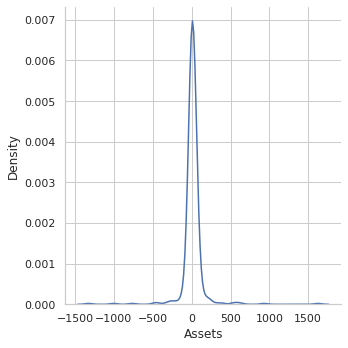

In [ ]:
sns.displot(testing_data_prediction-Y_test, kind='kde')